In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../datasets/books.csv", sep = ",")
df.head()

,Unnamed: 0,Title,Genre
0,0,When You Are Engulfed in Flames,Humor
1,1,Slaughterhouse-Five,"Fiction,Classics,Science Fiction"
2,2,Crow Mary,Historical Fiction
3,3,"The Six Deaths of the Saint (Into Shadow, #3)","Horror,Historical Fiction"
4,4,The Offing,"Poetry,Travel"


In [3]:
df['Genre'] = df['Genre'].str.split(',')
df.head()

,Unnamed: 0,Title,Genre
0,0,When You Are Engulfed in Flames,[Humor]
1,1,Slaughterhouse-Five,"[Fiction, Classics, Science Fiction]"
2,2,Crow Mary,[Historical Fiction]
3,3,"The Six Deaths of the Saint (Into Shadow, #3)","[Horror, Historical Fiction]"
4,4,The Offing,"[Poetry, Travel]"


In [4]:
pd.set_option('display.max_rows', None)
genre_counts = df['Genre'].value_counts()
genre_counts

Genre
[Manga]                                                                                                153
[Sports]                                                                                               150
[Cookbooks]                                                                                            146
[Childrens]                                                                                            129
[Poetry]                                                                                               120
[Music]                                                                                                118
[Science Fiction]                                                                                      117
[Travel]                                                                                               110
[Historical Fiction]                                                                                   109
[Art]                          

In [5]:
len(genre_counts)

713

In [6]:
unique_genres = df['Genre'].explode().unique().tolist()
print(unique_genres)

['Humor', 'Fiction', 'Classics', 'Science Fiction', 'Historical Fiction', 'Horror', 'Poetry', 'Travel', 'Nonfiction', 'Psychology', 'Spirituality', 'Memoir', 'Biography', 'Fantasy', 'Comics', 'Suspense', 'Crime', 'Thriller', 'Art', 'Christian', 'Science', 'Contemporary', 'Paranormal', 'Young Adult', 'Religion', 'Mystery', 'Business', 'Philosophy', 'Romance', 'Chick Lit', 'Sports', 'Graphic Novels', 'LGBT', 'History', 'Cookbooks', 'Childrens', 'Music', 'Self Help', 'Manga']


In [7]:
len(unique_genres)

39

In [8]:
# Define the emotion-genre mapping
# emotion_genre_mapping = {
#     'Angry': ['Family', 'Drama', 'Romance', 'Travel'],
#     'Disgust': ['Musical', 'Fantasy', 'History'],
#     'Fear': ['Musical', 'Fantasy', 'Action', 'Sports'],
#     'Happy': ['Action', 'Thriller', 'Sci-Fi'],
#     'Sad': ['Drama', 'Romance', 'Comedy'],
#     'Surprise': ['Thriller', 'Mystery', 'Adventure', 'Horror']
# }

# Define the emotion-genre mapping
emotion_genre_mapping = {
    'Angry': ['Romance', 'Travel','Music', 'Poetry', 'Fantasy', 'Historical Fiction'],
    'Happy': ['Thriller', 'Science Fiction'],
    'Sad': ['Romance', 'Comics'],
    'Neutral': ['Thriller', 'Comics','Horror','Romance','Science Fiction']
}

In [9]:
# Function to map emotions based on genres
def map_emotions(genres):
    emotions = []
    for emotion, genre_list in emotion_genre_mapping.items():
        if any(genre in genres for genre in genre_list):
            emotions.append(emotion)
    return emotions if emotions else ['Unknown']  # Assign 'Unknown' if no emotion is found

# Create a new column 'emotions' and map it based on genres
df['emotions'] = df['Genre'].apply(map_emotions)

# Display the resulting DataFrame
df.head()

,Unnamed: 0,Title,Genre,emotions
0,0,When You Are Engulfed in Flames,[Humor],[Unknown]
1,1,Slaughterhouse-Five,"[Fiction, Classics, Science Fiction]","[Happy, Neutral]"
2,2,Crow Mary,[Historical Fiction],[Angry]
3,3,"The Six Deaths of the Saint (Into Shadow, #3)","[Horror, Historical Fiction]","[Angry, Neutral]"
4,4,The Offing,"[Poetry, Travel]",[Angry]


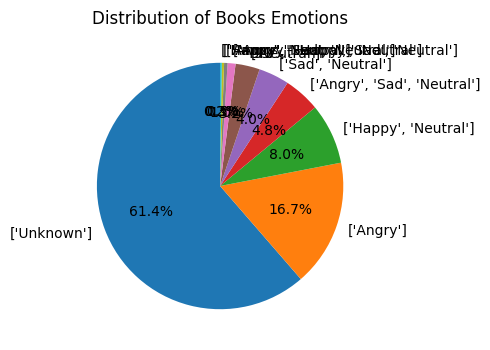

In [10]:
# Count the occurrences of each label
label_counts = df['emotions'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Books Emotions')
plt.show()

In [11]:
none_emotion = df.loc[df['emotions'].isna()]
none_emotion.Genre.value_counts()

Series([], Name: count, dtype: int64)

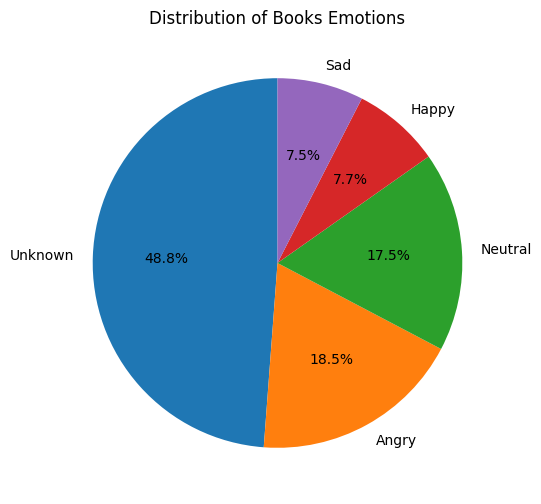

In [12]:
# Flatten the list of emotions
all_emotions = [emotion for emotions_list in df['emotions'] for emotion in emotions_list]

# Count the occurrences of each label
label_counts = pd.Series(all_emotions).value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Books Emotions')
plt.show()

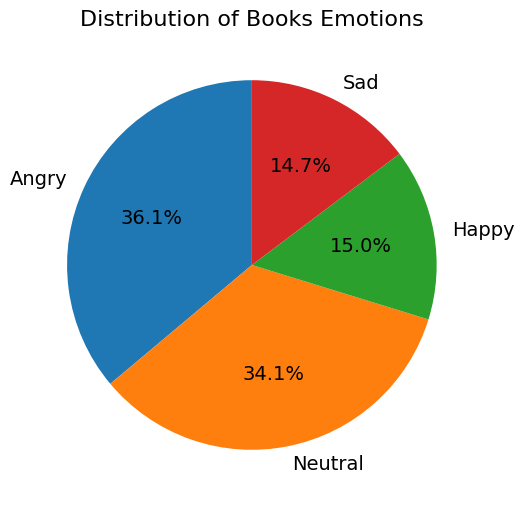

In [13]:
# Flatten the list of emotions and filter out 'Unknown' emotions
all_emotions = [emotion for emotions_list in df['emotions'] for emotion in emotions_list if emotion != 'Unknown']

# Count the occurrences of each label
label_counts = pd.Series(all_emotions).value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))  # Increase the size of the figure
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})  # Increase the fontsize
plt.title('Distribution of Books Emotions', fontsize=16)  # Increase the fontsize of the title
plt.show()

In [14]:
label_counts = df['emotions'].value_counts()
print(label_counts)

emotions
[Unknown]                       2836
[Angry]                          770
[Happy, Neutral]                 368
[Angry, Sad, Neutral]            221
[Sad, Neutral]                   186
[Neutral]                        147
[Angry, Happy, Neutral]           48
[Angry, Happy, Sad, Neutral]      21
[Angry, Neutral]                  14
[Happy, Sad, Neutral]             10
Name: count, dtype: int64


In [15]:
# Create df2 by dropping records with 'Unknown' label
df2 = df[df['emotions'].apply(lambda x: 'Unknown' not in x)].copy()

# Reset index
df2.reset_index(drop=True, inplace=True)

df2.rename(columns={'Title': 'name'}, inplace=True)
df2.rename(columns={'Genre': 'genre'}, inplace=True)

# Display the first few rows of df2
df2.head()

,Unnamed: 0,name,genre,emotions
0,1,Slaughterhouse-Five,"[Fiction, Classics, Science Fiction]","[Happy, Neutral]"
1,2,Crow Mary,[Historical Fiction],[Angry]
2,3,"The Six Deaths of the Saint (Into Shadow, #3)","[Horror, Historical Fiction]","[Angry, Neutral]"
3,4,The Offing,"[Poetry, Travel]",[Angry]
4,5,The Lost Continent: Travels in Small-Town America,[Travel],[Angry]


In [16]:
df2.shape

(1785, 4)

In [17]:
df2.to_csv('../datasets/book_filtered_data.csv', index=False)

In [18]:
unique_genres = df2['genre'].explode().unique().tolist()
print(unique_genres)

['Fiction', 'Classics', 'Science Fiction', 'Historical Fiction', 'Horror', 'Poetry', 'Travel', 'Nonfiction', 'Fantasy', 'Comics', 'Suspense', 'Crime', 'Thriller', 'Art', 'Contemporary', 'Young Adult', 'Romance', 'Chick Lit', 'Humor', 'LGBT', 'Graphic Novels', 'Music', 'Paranormal', 'Mystery', 'Childrens', 'Memoir', 'History', 'Biography', 'Manga', 'Religion', 'Sports', 'Christian', 'Spirituality', 'Philosophy', 'Psychology', 'Self Help', 'Science', 'Business']
